In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [77]:
# Load the dataset
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
# Preprocess the data
# Drop irrelevant columns
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
# Encode Categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


In [80]:
# OneHot Encode 'Geography'
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
geo_encoder=onehot_encoder.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [81]:
cols=onehot_encoder.get_feature_names_out(['Geography'])

In [82]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=cols)
geo_encoded_df.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [83]:
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [84]:
# Divide the Dataset into Independent and Dependent Features
X=data.drop(['Exited'],axis=1)
y=data['Exited']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Apply StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [85]:
# Save the Encoders in file
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder,file)

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

### ANN Implementation

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [87]:
# Build the ANN Model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),    # Hidden Layer 1 (HL1) connected with input layer
    Dense(32,activation='relu'),                                     # Hidden Layer 2 (HL2)
    Dense(1,activation='sigmoid')                                   # Output Layer
])

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()

In [90]:
# Compile the Model
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [91]:
# Setup the Tensorboard
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [92]:
# Setup Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [93]:
# Train the Model
model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8341 - val_loss: 0.3623 - val_accuracy: 0.8444
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3575 - accuracy: 0.8508 - val_loss: 0.3477 - val_accuracy: 0.8600
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8572 - val_loss: 0.3524 - val_accuracy: 0.8575
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8612 - val_loss: 0.3521 - val_accuracy: 0.8581
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8619 - val_loss: 0.3491 - val_accuracy: 0.8519
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3362 - accuracy: 0.8627 - val_loss: 0.3523 - val_accuracy: 0.8575
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8617 - val_loss: 0.3521 - val_accuracy: 0.8587

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities and convert to binary predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

63/63 [==============================] - 0s 2ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1607
           1       0.71      0.45      0.55       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



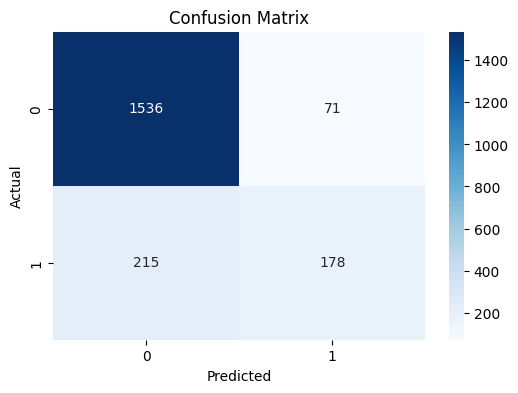

In [102]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC-AUC Score: 0.8566


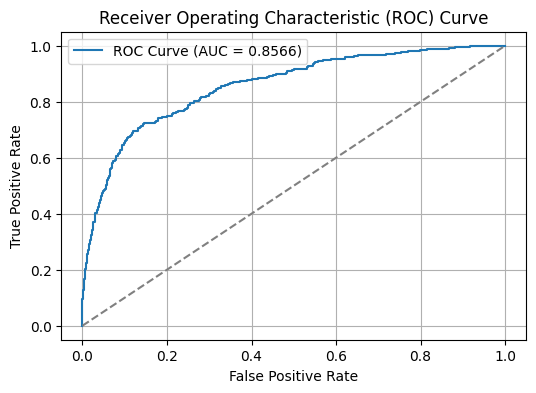

In [103]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [97]:
model.save('ann_model.h5')

/home/mehul/miniconda3/envs/churn_pred_ANN/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [99]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 8173), started 0:03:00 ago. (Use '!kill 8173' to kill it.)